In [250]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sas 
import numpy as np 

In [251]:
df=pd.read_csv('data_science.csv')
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Drop Columns

In [253]:
df.drop(['Unnamed: 0','salary'], axis=1 , inplace= True)


In [254]:
df


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


### Salary Average Depend  of Years

In [256]:
df2=df.groupby('work_year')['salary_in_usd'].mean()
df2

work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64

In [257]:
data={
    'Work_year':df2.index,
    'aver_salary':df2.values
}
df2=pd.DataFrame(data)

In [258]:
df2

,Work_year,aver_salary
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


In [259]:
df2['aver_salary']=(df2['aver_salary']/1000).round(2)

In [260]:
df2

,Work_year,aver_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


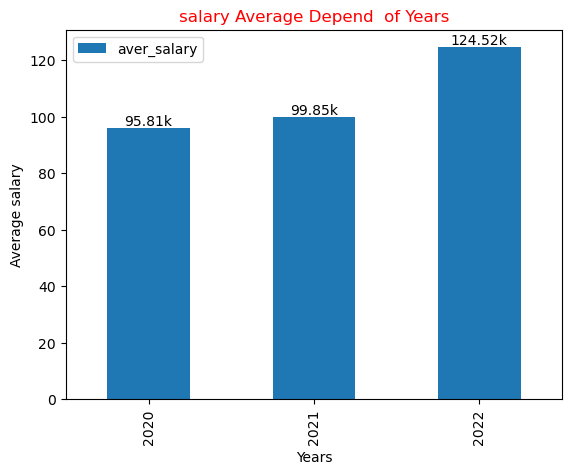

In [261]:
ax1=df2.plot(kind='bar',x='Work_year',y='aver_salary',legend=True)
plt.bar_label(ax1.containers[0],labels=df2['aver_salary'].map('{:}k'.format))
ax1.legend(['aver_salary'],loc='upper left')
plt.title('salary Average Depend  of Years' , color='red')
plt.xlabel('Years')
plt.ylabel('Average salary')
plt.show()

### Remote Options

In [263]:
df3=df.remote_ratio.value_counts().to_list()

In [264]:
label=['Fully Remote','No Remote','Partially Remote']

In [265]:
df3

[381, 127, 99]

[Text(0, 0, '381'), Text(0, 0, '127'), Text(0, 0, '99')]

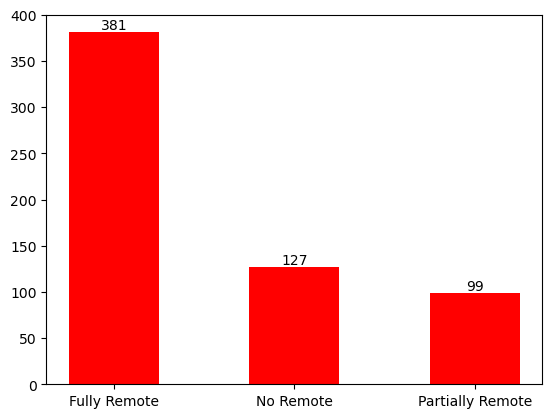

In [266]:
z=plt.bar(label,df3,width=0.5, color='red')
plt.bar_label(z,labels=df3)

### Company Size

In [268]:
values2=df.company_size.value_counts().to_list()

In [269]:
values1=df.company_size.value_counts()
values1

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [270]:
type_of_work=['Medium','Large','Small']

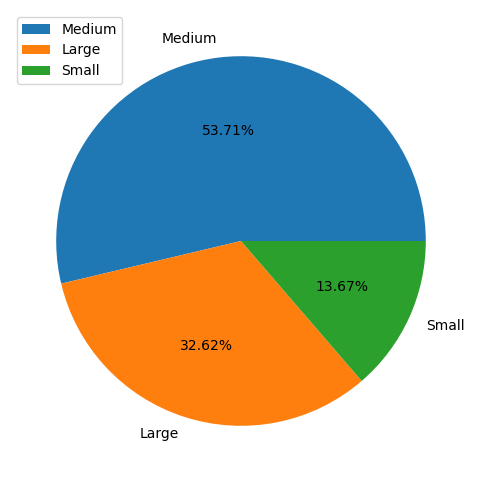

In [271]:
plt.figure(figsize=(13,6))
plt.pie(x=values2,labels=type_of_work ,autopct='%1.2f%%')
plt.legend(type_of_work , loc='upper left')
plt.show()

### Top 5 Jobs Titles

In [273]:
df4=df.job_title.value_counts().head(5)

In [274]:
df4.index


Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='job_title')

In [275]:
df4.values

array([143, 132,  97,  41,  16], dtype=int64)

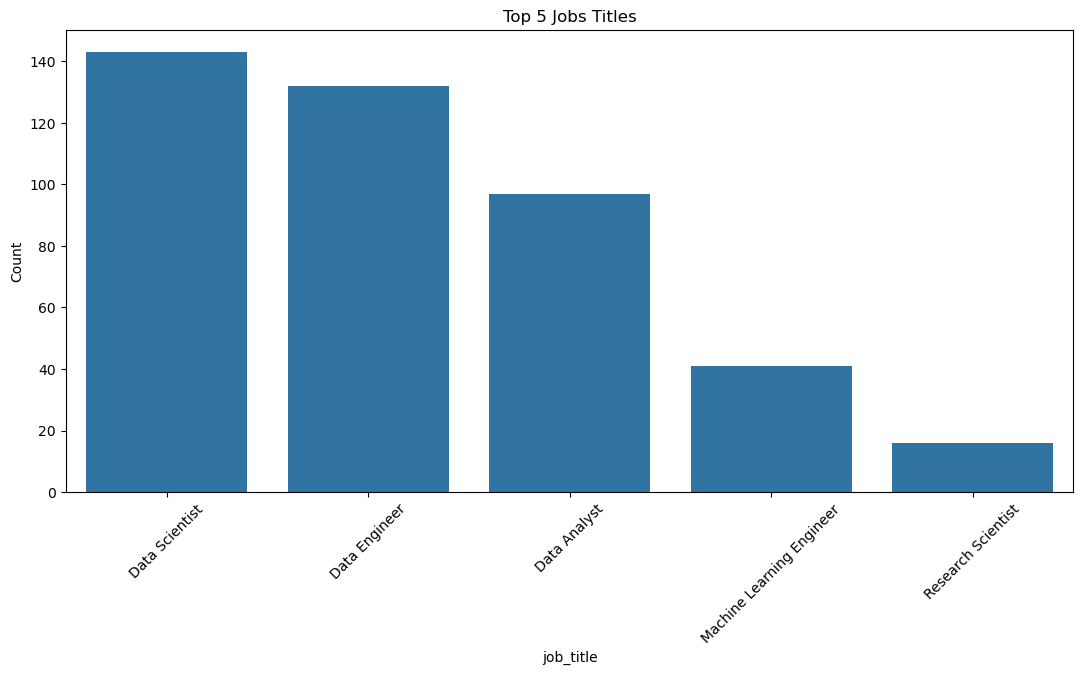

In [276]:
plt.figure(figsize=(13,6))
sas.barplot(x=df4.index,y=df4.values)
plt.title('Top 5 Jobs Titles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of salary by company size

In [278]:
df5=df[['company_size','salary_in_usd']]


In [279]:
df5

,company_size,salary_in_usd
0,L,79833
1,S,260000
2,M,109024
3,S,20000
4,L,150000
...,...,...
602,M,154000
603,M,126000
604,M,129000
605,M,150000


In [280]:
S=df5[df['company_size']=='S']
M=df5[df['company_size']=='M']
L=df5[df['company_size']=='L']
labels=['Small','Medium','Large']
salary_mean=[S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()]
salary_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [281]:
label_change=np.round([x/1000 for x in salary_mean],2)
label_change=list(map(str,label_change))
label_change=[x+'K' for x in label_change]
label_change

['77.63K', '116.91K', '119.24K']

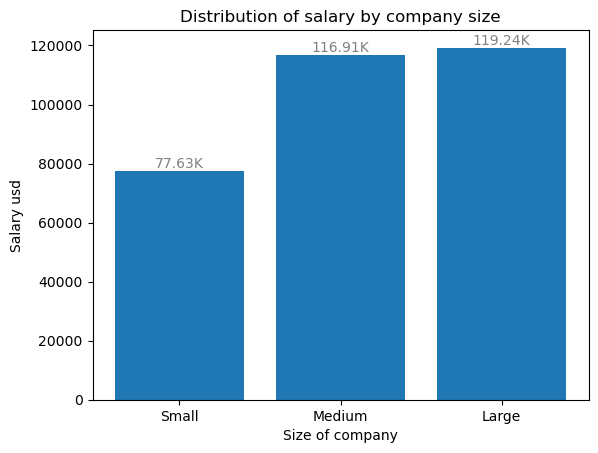

In [282]:
z=plt.bar(labels,salary_mean)
plt.bar_label(z,labels=label_change, alpha= 0.5)
plt.title('Distribution of salary by company size')
plt.xlabel('Size of company')
plt.ylabel('Salary usd')
plt.show()

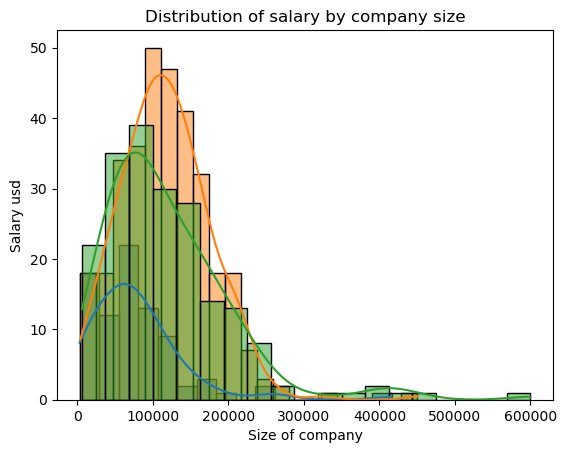

In [283]:
sas.histplot(S['salary_in_usd'],label='Small',kde=True)
sas.histplot(M['salary_in_usd'],label='Meduim',kde=True)
sas.histplot(L['salary_in_usd'],label='Large',kde=True)

plt.title('Distribution of salary by company size')
plt.xlabel('Size of company')
plt.ylabel('Salary usd')
plt.show()

### Experience level


In [285]:
df6=df.experience_level.value_counts()
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [286]:
map_exp={
    'SE':'Seriour',
    'MI': 'Middle', 
    'EN':'Entry level',
    'EX':'Executive'
}

In [287]:
df['experience_level'].map(map_exp)

0       Middle
1      Seriour
2      Seriour
3       Middle
4      Seriour
        ...   
602    Seriour
603    Seriour
604    Seriour
605    Seriour
606     Middle
Name: experience_level, Length: 607, dtype: object

In [288]:
df6

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [289]:
labels=df6.index.to_list()
labels

['SE', 'MI', 'EN', 'EX']

In [290]:
values=df6.values
values

array([280, 213,  88,  26], dtype=int64)

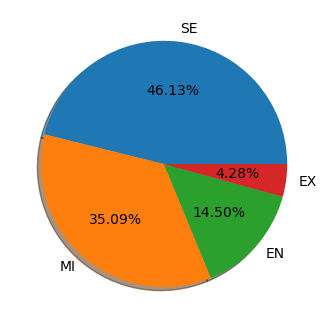

In [291]:
plt.figure(figsize=(13,4))
plt.pie(x=values,labels=labels ,autopct='%1.2f%%', shadow= True)
plt.show()